# Wikilambda the Ultimate

The Wikimedia foundation’s search for the perfect language

[Michael Falk](https://michaelfalk.io) [](https://orcid.org/0000-0001-9261-8390) (The University of Melbourne)

In 2020, the Wikimedia foundation launched its first new project in nearly a decade. The new project consists of two main parts: (1) Wikifunctions, a library of programming functions; and (2) Abstract Wikipedia, a language-agnostic Wikipedia that will be dynamically translated into the reader’s native tongue. Lying beneath both Wikifunctions and Abstract Wikipedia is a new system called Wikilambda, which can execute code in potentially any programming language, providing a massively flexible computing service drawing on Wikifunctions and powering Abstract Wikipedia. The entire system is designed to address a fundamental bias in Wikipedia, namely its bias towards majority languages like English and Spanish. In this paper, I present Wikilambda as an audacious attempt to realise a ‘perfect language’, as theorised by Umberto @eco_search_1995. Wikilambda provides a way of specifying functions that is supposed to transcend any particular ‘native’ language. In this way, it provides editors of Wikifunctions and Abstract Wikipedia with a way of contributing to the overall system no matter which ‘native’ programming languages they know. More broadly, Wikilambda aims to achieve the ‘democratization of programming’, by enabling any person to use any function without needing to know English or a particular programming language \[@vrandecic_building_2021\]. To analyse the technical and ideological aspects of Wikilambda, I apply the techniques of Critical Code Studies \[@marino_critical_2020\] to ‘the orchestrator’, the JavaScript application that instantiates Wikilambda’s new functional programming language. In the absence of a formal specification of the language, the Abstract Wikipedia team have gradually hacked Wikilambda out of JavaScript, leaving a fascinating public record of their attempt to realise their vision for a universal programming system.

> The story of the search for the perfect language is the story of a dream and of a series of failures. \[@eco_search_1995, p. 19\]

## Introduction: the risk

On New Year’s Day, 2023 an alarming headline appeared in *The Signpost*, Wikipedia’s community newsletter:

> Wikimedia Foundation’s Abstract Wikipedia project “at substantial risk of failure” \[@bayer_wikimedia_2023\]

Abstract Wikipedia is a bold project conceived by Denny Vrandečić, the computer scientist behind the last major project of the Wikimedia Foundation: Wikidata. With Wikidata, Vrandečić had aimed to provide a machine-readable complement to Wikipedia. On Wikipedia, a human might read a person’s biography. On Wikidata, a computer can extract structured data for use in knowledge graphs and information retrieval. Vrandečić’s new project, Abstract Wikipedia, would combine the benefits of Wikipedia and Wikidata. In Abstract Wikipedia, human writers would compose articles in a machine-readable “template language.” A computer would “render” these articles into all the world’s languages. Ten years after they bet the farm on Vrandečić’s Wikidata project, the Wikimedia Foundation were ready for their next big gamble. In 2020, they re-hired Vrandečić from Google, launched Abstract Wikipedia as an official project, and in 2022-23, awarded the project US\$1 million from the Wikimedia Endowment \[@noauthor_annual_2023; @foundation_first_2023\].

Three years in, and the project was “at substantial risk of failure.” What happened?

At the heart of the story is a programming language, or rather an entire programming *system*, called Wikilambda. Wikilambda is an extension to the MediaWiki software that runs Wikipedia. By default, MediaWiki allows contributors to read and write *articles*. The Wikilambda extension allows them to read and write *functions*. An article is to be *read*. A function can be *executed*. Wikilambda underlies the new Wikifunctions database, which one day will host the software that runs Abstract Wikipedia.[1] Wikilambda is the reason for the “substantial risk of failure” reported in *The Signpost*. The idea of an “Abstract” Wikipedia, dynamically translated into all the world’s languages, is audacious enough. The idea of programming this new Abstract Wikipedia in a brand-new general-purpose programming system the like of which the world has never seen—is sublime.

Wikilambda provides a brand-new programming language and a brand-new environment for programming in it. The language has been designed to be maximally flexible and accessible. It will allow *any* person of *any* skill level to write *any* program in *any* language—that is, in any *natural* or *programming* language. If you wish to implement a function in Haskell, but use Hindi names for the function arguments, that’s fine! Wikilambda will ensure your Haskell function works with code written in C or Python, and will ensure that an Italian reader can read the function arguments in their own tongue. If you know what a function should do, but don’t know how to implement it, you can add the function to the database, write a description and perhaps some test cases to specify its behaviour, and wait for an experienced programmer to submit an implementation of the function.

Wikilambda will provide a common language for computer scientists and native language speakers, who will meet in Wikifunctions to build all the software for Abstract Wikipedia. This pooling of expertise is essential to achieve Abstract Wikipedia’s aims. The world’s native speakers are needed for their linguistic expertise, and the world’s programmers are needed for their coding prowess. Wikilambda gives these experts a language in which to communicate. Remarkably, this language has no name. The Abstract Wikipedia team sometimes call it the “Function Model,” and sometimes “the orchestrator” \[@noauthor_wikifunctionsfunction_2024\]. At other times, they deny it is a language: “Wikifunctions is not a programming language, nor is trying to evangelise a particular language.” \[@noauthor_wikifunctionswhat_2024\] But as the project has proceeded, the team have become embroiled in all the tricky problems of programming language design, and some observers have doubted their decisions.

The gravest doubters were the Google Fellows, a group of Google engineers seconded to the project. It was their damning evaluation of Wikilambda that triggered the story in *The Signpost*:

> To summarize, creating a good programming language is hard, and having a good clear initial design is crucial. The Wikifunctions model ignores decades of programming language research and existing technology. Instead, it invents a completely new ad-hoc system, but that unfortunately does not seem to have good properties, and it is questionable whether it will be able to support a large, complex software system, \[such\] as Abstract Wikipedia. \[@livneh_abstract_2022\]

Wikilambda is indeed remarkably “ad-hoc.” There is no specification of the language. There is no public procedure for agreeing on a specification. In this respect, Wikilamba makes a striking contrast with other free and open-source (FOSS) languages of the internet era, such as Python, Haskell or Common LISP, which have been designed collaboratively by online communities \[@hudak_conception_1989; @orlikowski_its_2002; @nand_sharma_unearthing_2022\]. Unlike these carefully negotiated languages, Wikilamba appears to have been hacked together according to the whims and aspirations of its creators, who are fired by the uniqueness and morality of their enterprise. In their response to the Google Fellows’ evaluation, the Abstract Wikipedia team brushed aside the engineering concerns. The Google engineers might want the Abstract Wikipedia team to choose a single, proven, technical solution to their project, but this would defeat the aim of allowing “the community to co-create the necessary solutions for Abstract Wikipedia” \[@blanton_abstract_2022\]. Under-specification is not a failure of Wikilambda—it is the whole point.

In this essay, I seek to understand both the audacity and the ad-hockery of Wikilambda, the only piece of Abstract Wikipedia that currently exists. As a scholar of Eighteenth-Century literature, I feel in familiar territory. Wikilambda is only the latest of many proposals for a “perfect” or “universal” language, a language that will end the curse of Babel and unite the people of the world into a single community. Vrandečić himself is aware of this history, and tries to distinguish Abstract Wikipedia from the failed “universal language” of the seventeenth-century German philosoper Gottfried Leibniz \[-@vrandecic_building_2021, p. 41\]. Vrandečić is in fact correct to distinguish Abstract Wikipedia and Wikifunctions from Leibniz’s *characteristica universalis*, but this is only because he has picked the wrong example. Leibniz aimed to create a language that would make formal reasoning more reliable. Vrandečić aims to create a language—or languages—in which speakers of any language can communicate. He aims to create a “polygraphy” \[@eco_search_1995, chap. 9\]. Unfortunately for Vrandečić, every prior attempt at polygraphy has also failed.

The history of “perfect” and “universal” languages provides a rich context for understanding Wikilambda, and appreciating the particular variety of digital utopianism it expresses. In what follows, I apply Umberto Eco’s \[-@eco_search_1995\] theory of perfect and universal languages to Wikilamba, unpacking the rhetoric and design decisions of the project. In @sec-universality and @sec-perfection, I consider first the “universal” and then the “perfect” aspects of Wikilamba, as expressed in the published writings of Vrandečić and his team. @eco_search_1995 \[p. 73\] usefully distinguishes universality from perfection: a “universal” language is one “which everyone might, or ought to, speak;” a “perfect” language is one “capable of mirroring the true nature of objects.” I show that Vrandečić and his team vigorously defend the universality of Wikilambda, and make an altogether more paradoxical argument for its perfection. In @sec-code, I analyse the source code of “the orchestrator,” using the methods of Critical Code Studies \[@marino_critical_2020\]. The code itself records the struggle of the Abstract Wikipedia team to enact their vision. By studying the revision history of the code, we can see the Wikilambda ideology in the raw, as the team hew their utopia out of JavaScript.

Wikilambda is remarkable, both as a utopian proposition and as a digital platform. As a *utopia*, Wikilambda is communitarian, and implicitly critiques the entrepreneurial individualism of Silicon Valley and the “Californian Ideology” \[@barbrook_californian_1996; @turner_counterculture_2006\]. In this perspective, Wikilambda is an attempt to extend into computer programming the much-studied agonistic governance structures of Wikipedia \[@tkacz_wikipedia_2015; @crawford_what_2016; @ford_writing_2022\]—despite the lack of such governance in the platform’s actual development. As a *platform*, Wikilambda attempts to realise something genuinely new: a platform whose own API is programmable by the community. Wikilambda thus moves beyond the three kinds of platform famously identified by @andreessen_three_2007 \[see also @helmond_platformization_2015\]. While it is hard to believe that Wikilambda will succeed, let alone the broader Abstract Wikipedia project, its audacity merits close attention.

## Universality: functions for all!

> Imagine a programming system that is **collaboratively** grown and maintained, to which everyone can contribute, and that everyone may share. \[@noauthor_wikifunctionsvision_2023\]

The primary aim of Wikilambda is to enable wiki-programming. Just as Wikipedia is the encyclopaedia anyone can edit, Wikifunctions will be the *library*, and Abstract Wikipedia the *application*, that anyone can program. The Wikilambda developers identify two barriers to their aim: (1) most programming languages use English vocabulary, but most people don’t speak English; (2) most programming systems require you to be a skilled programmer to contribute, but most people aren’t skilled programmers. The developers promise to crash these barriers, and create the first truely universal programming system.

### All languages in one

> Imagine a programming system that truly is **accessible**, one that is open not only to speakers of English but to billions of people more who will not have to learn English first in order to learn how to program. \[@noauthor_wikifunctionsvision_2023\]

The other side to Wikifunctions’ democratising mission its language neutrality. Nearly all programming languages, complain the Wikifunctions developers, are based on English. Even languages such as Python, Ruby, Erlang and Lua, whose designers speak languages other than English, use English as a source of keywords: `function`, `if`, `do` \[@marino_critical_2020, p. 151\]. According to the Wikifunctions team, the Anglocentrism of programming makes it inaccessible. To learn Lua or Ruby, I need to “learn English first.” Otherwise, how could I understand what `if` does?

In their response to the Google Fellows’ Evaluation, the Wikifunctions team spell out the political consequences of Anglocentric programming languages.

> A solution designed by a small group of Westerners is likely to produce a system that replicates the trends of an imperialist English-focused Western-thinking industry. Existing tools tell a one-voice story; they are built by the same people (in a socio-cultural sense) and produce the same outcome, which is crafted to the needs of their creators (or by the limits of their understanding). Tools are then used to build tools, which will be again used to build more tools; step by step, every level of architectural decision-making limits more and more the space that can be benefitted by these efforts. \[@blanton_abstract_2022\]

In conventional programming systems, the programmer is constrained to think in English. First the language has English vocabulary, then the tooling and documentation and libraries are written in English, then finally the “space” of possible programs in a given language is limited to the space of English utterances. “The masters tools cannot demolish the master’s house,” as Audre Lorde one said. **REF** The only solution is to ditch the tools, leave the house, and construct a new edifice on a different foundation.

Wikifunctions is not the first system that allows people to program in something like their native language. When Grace Murray Hopper designed FLOW-MATIC in the 1950s, she wrote compilers for French and German versions of the language, as well as the initial English version. More recently, Ramsey Nasser designed قلب (or ’alb), a variant of Scheme that runs right-to-left and uses Arabic characters. In Hawai’i, the ’Anu’u project is translating C# into into Hawai’ian. \[@marino_critical_2020, pp. 151-4\].

Surveying these examples, Mark Marino agrees with the Wikifunctions team. The Anglocentrism of programming langauges can have a “colonizing effect,” by rendering programming less “accessible” to non-English speakers \[@marino_critical_2020, pp. 132-33\]. Despite this, @marino_critical_2020 \[p. 145-147\] does reveal an unsolved problem at the heart of postcolonial language design. The fact is that “words in code simply do not behave the way they do in spoken or written language.” Accordingly, knowing English might actually *detract* from your ability to understand a given programming language, because the English meaning of the word may “obfuscate” the meaning of the word in the programming language. One of the most common operations in programming is to `print` text to the screen—but in English, the word “print” does not mean *make appear on a computer screen*. There are many similar examples in Scheme, the language that Nassar translated into Arabic. Many English speakers have probably been very confused when they encounter the Scheme function `mapcar`, which *applies the passed operator to the first item of each list in a list of lists*. There is in fact a very abstract relationship between `mapcar` and cartography, but there is no relation at all between `mapcar` the the Model T Ford.

### Functional literacy

How can you program without being a programmer?

*Wikifunctions* is quite different to previous computer literacy languages. Most programming languages developed for computer literacy have been *imperative* and *interactive*. Key examples of such languages include BASIC, LOGO, Processing, and Scratch. There are good reasons for both the *imperative* and *interactive* aspects of these languages. An *imperative* language allows you to command the machine to do something. An *interactive* language gives immediate feedback, so the user can see the results of their commands. A child learning to program with LOGO, for example, can command a robotic “turtle” to turn 90 degrees clockwise, move forward 10cm, and repeat, eventually marking out a square route on the ground. The *imperative* nature of the language gives the child a simple model of computing: computing is an activity where a human directly controls the actions of a machine. The *interactive* nature of the language gives the child real-time feedback on their program: does the robotic turtle move as they expect? This loop of command-and-feedback allows children to teach themselves though an iterative process. They can experiment with new commands, see the results, correct their own work, and empower themselves to understand and dominate the machine. At least, this is the ideal. **Refer to Papert and Vee.**

Wikifunctions eschews this model of computer literacy. To “democratize” programming, the Wikifunctions team invites members of the public to *specify functions*, rather than to issue commands and see the results. In LOGO or BASIC, the beginning programmer is encouraged to experiment with some elementary commands. If I tell the computer to do X, then Y, then X again, what will be the output? In Wikifuctions, the process is reversed. The beginning programmer is first required to think of the desired output. If there is no function in the database that provides this output, then they should create a new entry in the database. Then they should name the function, and describe its desired output in a natural language such as Gikuyu or Tok Pisin. They may wish to write some tests, to determine whether a given implementation of the function does indeed produce the required output. If they already know how to code, they may now try to implement the function in a programming language like Python or Javascript, and run the test suite to see if the function does as required.

@livneh_abstract_2022 critique this approach: this “pure-functional” style of programming is “less intuitive to the average programmer” than traditional imperative programming. In particular, they observe that some aspects of imperative programming, such as “global state,” “randomness” and “non-determinism” make it very much easier to implement natural language generation systems, the very system that Wikifucntions is supposed to implement for Abstract Wikipedia. @blanton_abstract_2022 make two arguments in defence of their design for Wikifunctions: First, the “average programmer” is the wrong yardstick, because Wikifunctions is aimed at “non-technical” contributors. Second, the “average programmer” has probably received a conventional computer science education, which is strongly biased towards imperative programming. Non-technical people are not limited by such an education, and “could easily learn or adapt to a functional model.”

On the face of it, the argumments of the Wikifunctions team are very weak. If functional programming is so intuitive for “non-technical” people, why has every successful computer literacy languge been imperative? Their argument seems to be *post facto*. They decided that Wikilambda should provide a functional programming language, because they planned to develop a database of *functions*. Now that their choice of the functional paradigm is under fire, they manufacture a defence.

In another context, however, the Wikifunctions argument does make more sense. One of the key problems of programming is specifying the requirements. This is especially difficult in natural langauge generation, especially when, as in Abstract Wikipedia, the aim is to generate text in all the world’s languages. There are so many languages, with so many syntactic rules, morphological transformations, idiomatic expressions and irregular exceptions. How can all these languages be accommodated in a single software system?

One way is for native speakers to specify the requirements. For example, a Swahili speaker knows that you form the simple past of a Swahili verb by inserting the infix *-li-* in the correct position. A “non-technical” Swahili speakers may not be able to write a Python program to insert *-li-* correctly, but they ought to be able to explain this rule—in Swahili—and write a couple of examples of how a verb is conjugated using *-li-*. In this context, the usual arguments for *imperative* and *interactive* programming in computer literacy education fade away. The “non-technical” Swahili speaker doesn’t need an *imperative* language: their aim is not to tell the computer how to insert the *-li-* in the correct place; their aim is simply to describe what the correct place is. They likewise don’t need an *interactive* environment: they don’t need to see what the output is, because they already know what output they want. Once they have specified the function, the “non-technical” Swahili speaker than then leave it to others to implement it. Perhaps a second user will translate the function description into Hindi, and then a third will read the description and implement the function in JavaScript.

This is a fundamentally new model of computer literacy. It invites beginning programmers to *describe* rather than to *command* the machine. Beginning programmers are not invited to learn a skill, or acquire a vocabulary. When a child learns Scratch, they are presented with a menu of little building-blocks, whose meaning they need to learn. ↑ moves a character up. → moves a character to the right. These pieces snap together in a certain way. In Wikifunctions, there are no such building-blocks, and no such rules about how they snap together. It is up to the beginning programmer, the “non-technical person,” to say what building-blocks they would like, and how they should fit together! It is as though you gave a child a LEGO set, but instead of handing them a collection of pieces and an instruction manual, the set contained a 3D printer and a facility for the child to draw and print out the pieces they wanted. Would this free the child from corporate control, unshackling them from the stale conventions of LEGO’s standard inventory? Would children across the world develop a new and better inventory of LEGO pieces that better match their innate creativity? Or would they be paralyzed by choice, unable to even begin?

More ideas:

-   Syntax: Wikifunctions has a fixed syntax (lazy evaluation, prefix notation, weird inclusion of function calls and argument references as types)
-   Documentation: Wikifunctions aims to have intrinsically polylingual documentation

Key sources:

-   @livneh_abstract_2022
-   @blanton_abstract_2022
-   @vrandecic_building_2021
-   @vrandecic_capturing_2018 \<– interesting that in this first paper, DV doesn’t mention Wikifunctions. At what point did that become part of the plan?
-   @noauthor_wikifunctionswhat_2024

## Perfection: the language that is not a language

> But it is perhaps nothing more than our ‘democratic’ illusion to imagine that perfection must imply universality. \[@eco_search_1995, p. 190\]

What would it mean for a programming language to be ‘perfect’? The perfect languages surveyed by @eco_search_1995 attempt to align their vocabulary and syntax with nature. The vocabulary of a perfect language should include exactly one word for each natural kind. The grammar of a perfect language should all the speaker or writer to combine these words in exactly the way that these natural kinds are combined in nature. The language itself ought to be a mirror of the world, such that any fact about the world can be expressed concisely and unambiguously. Of course the whole project relies on the idea that there are a finite set of natural kinds, and that the rules for their combination are known.

Programming languages are obviously more limited than natural languages, because they exist for a specific purpose. A programming language is designed to program a computer. Thus to be perfect, a programming language only needs one word for each natural kind *of computation*, and grammatical rules that allow these natural kinds to be combined *as a computer is able to combine things*. What are the natural kinds of computation? What are the primitive elements of all computer programs, and what are the ways they can be combined? In this section, I try to see how Wikilambda answers these questions, by comparing its language to Scheme, a language developed by AI researchers in the 1970s that resembles the Wikilambda language in crucial respects.

There have been many attempts to answer these questions, and to create a universally valid model of computation. The two most famous attempts are Alan Turing’s universal machine \[-@turing_computable_1936\], and Alonzo Church’s λ-calculus \[-@church_set_1932\]. The “universality” of Turing’s machine is different to the “universality” discussed above in @sec-universality. Turing’s machine is “universal” because it is theoretically able to perform any computation. Church’s λ-calculus has the same property \[@turing_computability_1937\]. Wikilambda invokes Turing and Church to stake its own claim for perfection. The software is named after Church’s λ-calculus. The Wikifunctions database incorporates a stylized lambda into its logo (@fig-wikifunctions-logo). The Google Fellows report that “Turing-completeness” is an explicit requirement of the system \[@livneh_abstract_2022\], though it is Church’s λ-calculus that has more directly inspired the design of the Wikilambda language.

{#fig-wikifunctions-logo }

### Wikilambda’s claim to perfection

The Wikilambda team do not simply claim that their language is Turing-complete. Many languages are Turing-complete, including deliberately unusable languages like Brainfuck \[@mateas_box_2005\], and languages not intended for programming, such as the typesetting system TeX. Indeed, philosophers have debated whether there is *any* physical object which is *not* Turing-complete \[@chalmers_does_1996\]. The Wikilambda team make a stronger claim than Turing-completeness. Not only is their language able to express any computation, but its syntax mimics the natural form of computation itself: “… we do not really think of function composition as a new programming language, but rather as an abstract syntax tree to compose function calls together …” \[@blanton_abstract_2022\]. Taken at its strongest, this statement implies that the Wikilambda language is perfect. Conventional programming languages are parsed into “abstract syntax trees,” which are then converted into machine code. Wikilambda strips away everything on top of the abstract syntax tree, giving the user direct access to the program as the computer sees it. It is not really a “language,” because it is immediate. Nothing stands between the programmer and the actual structure of their program. When the user manipulates this language, they manipulate the abstract syntax tree itself.

The Wikilambda team make this case with considerable uncertainty, and hedge their arguments. They wonder whether the difference between a “language” and an “abstract syntax tree” is merely “terminological,” and then ironise their argument with an emoticon: “… the function model in the ZObject system merely allows nesting function calls and express\[ing\] data. How hard can that be? ;)” \[@blanton_abstract_2022\]. On the page “What Wikifunctions is Not,” they insist again that this is “Not a Programming Language,” stressing that Wikilambda’s function composition “will be extremely limited compared to most other programming languages, since we only allow for nested function calls and that’s it.” \[@noauthor_wikifunctionswhat_2024\] Elsewhere they do, however, admit that they are involved in a tricky process of language design. In the README for the “function orchestrator,” they admit that “the orchestrator kind of implements a functional programming language,” and apologise for the resulting “complexity” of the code \[@massaro_function_2024\]. This uncertainty in the documentation suggests that the Wikilambda team are unsure what exactly they are making. Are they “kind of” making a very “limited” language that “merely” or “only” allows nesting of functions? Or is that just an empty “terminological” question?

In fact the Wikilambda language is not an “abstract syntax tree,” and there is nothing “mere” or “limited” about it. The supposed “limitations” of the language are actually deliberate decisions about what features to implement within it. Comparing the Wikilambda language with Scheme reveals some of these important decisions.

### Wikilambda and Scheme compared

Scheme is an influential dialect of the LISP programming language. The Wikilambda team also consider their language to be a dialect of LISP: “If there was a TLDR of the project it would probably be ‘something like LISP in JSON’.” \[@noauthor_wikifunctionsfunction_2024\] Like Scheme, the Wikilambda language is very simple. In this simplicity, Scheme and Wikilambda differ from other dialects of LISP, such as Common LISP and Clojure, which include additional features to support common programming tasks \[@bergin_evolution_1996; @hickey_history_2020\].

The inventors of Scheme present it as an extension of the λ-calculus , and claim a certain kind of perfection for the language. Scheme extends the λ-calculus with just enough features to make it “convenient,” while retaining the power of the λ-calculus to represent the inner structure of a computation. Thus Scheme is not merely a programming language, but a powerful “meta-language” that can be used to study the nature of computation itself \[@sussman_scheme_1975; @steele_jr_lambda_1976\]. In a series of famous memos, known as the “Lambda Papers,” Gerald Sussmann and Guy Steele demonstrated how a range of popular programming constructs could be easily simulated in Scheme, including continuation-passing, message-passing, imperative and structured programming \[@steele_jr_lambda_1976-1; @steele_jr_lambda_1976; @steele_jr_debunking_1977\]. Thus Scheme’s perfection is twofold: it exposes the fundamentals of computation by resembling the λ-calculus, while also having the ability to morph into many other programming languages.

The Wikilamba language is even simpler than Scheme. This simplicity has led its creators into some difficult design choices. We can see the crucial differences by comparing a short program in each language. I have chosen the factorial function, a simple function often used to demonstrate recursive programming to beginners. In mathematical notation, “factorial of n” is written $n!$. To compute the factorial of a number, you multiply all the natural numbers up to $n$. For example, to compute the factorial of 6:

It is possible to describe the factorial function using two simple rules, which can then be used to implement it in a programming language. To find these two rules, we first observe a pattern in the function:

From this, we can derive the first rule

$$n! = n \times (n - 1)!$$

This is a “recursive” rule, because the factorial function is defined in terms of itself. The factorial of $n$ is equal to *the factorial* of $(n - 1)$ multiplied by $n$ itself. This recursion could go on forever, so we need a second rule to stop subtracting $1$ from $n$. The required rule is simple: $0! = 1$. When $n$ is equal to $0$ we stop subtracting $1$, and we can multiply all the terms together to get the final answer.[2]

@lst-scheme-factorial shows how to write the factorial function in Scheme, using these two rules.

``` code-annotation-code
(define (factorial n)
  (if (= n 0)
      1
      (* n (factorial (- n 1)))))
```

On line 1, we `define` a new function called `factorial`, which takes one input, called `n`. On line 2, we decide which rule to apply. If `n` is equal to zero, then the first option will be chosen (the “consequent”), and the function will simply output the value `1`. If `n` is equal to any other number, then the second option will be chosen (the “alternative”). In this case, `n` will be multiplied by the output of the factorial function applied to `n - 1`. In Scheme, as in many programming languages, `*` is the multiplication symbol. Thus the expression `(* n (factorial (- n 1)))` is exactly equivalent to $n \times (n - 1)!$.

@lst-wikilambda-factorial is the current Wikilambda implementation of the factorial function in the Wikifunctions database \[@noauthor_factorial_2024\]. This is its representation in “canonical form,” which is the format used within the system to represent Wikilambda code. Users are not exposed to the code directly. Instead, they see a visual representation of the code, with the various `Z`-codes translated into their preferred language (@fig-wikilambda-factorial).

``` r
factorial_zid <- "Z13863"
revision_id <- "101571" # Revision at time of writing
wikilambda_factorial <- httr2::request("https://www.wikifunctions.org/w/api.php") |> 
  httr2::req_url_query(
    action = "wikilambda_fetch",
    zids = factorial_zid,
    language = "en",
    revid = revision_id,
    format = "json"
  ) |> 
  httr2::req_perform() |> 
  httr2::resp_body_json() |>  
  purrr::pluck(factorial_zid, "wikilambda_fetch")
# Create the code block. Using `results: asis` inserts the output as raw text
# into the markdown document, allowing us to use quarto's formatting features.
cat(
  "```{#lst-wikilambda-factorial .json lst-cap='A recursive implementation of factorial in Wikilambda'}\n",
  wikilambda_factorial[[1]],
  "\n```")
```

     {
        "Z1K1": "Z2",
        "Z2K1": {
            "Z1K1": "Z6",
            "Z6K1": "Z13863"
        },
        "Z2K2": {
            "Z1K1": "Z14",
            "Z14K1": "Z13667",
            "Z14K2": {
                "Z1K1": "Z7",
                "Z7K1": "Z802",
                "Z802K1": {
                    "Z1K1": "Z7",
                    "Z7K1": "Z13522",
                    "Z13522K1": {
                        "Z1K1": "Z18",
                        "Z18K1": "Z13667K1"
                    },
                    "Z13522K2": {
                        "Z1K1": "Z13518",
                        "Z13518K1": "0"
                    }
                },
                "Z802K2": {
                    "Z1K1": "Z7",
                    "Z7K1": "Z13636",
                    "Z13636K1": {
                        "Z1K1": "Z13518",
                        "Z13518K1": "1"
                    }
                },
                "Z802K3": {
                    "Z1K1": "Z7",
                    "Z7K1": "Z13539",
                    "Z13539K1": {
                        "Z1K1": "Z18",
                        "Z18K1": "Z13667K1"
                    },
                    "Z13539K2": {
                        "Z1K1": "Z7",
                        "Z7K1": "Z13667",
                        "Z13667K1": {
                            "Z1K1": "Z7",
                            "Z7K1": "Z13582",
                            "Z13582K1": {
                                "Z1K1": "Z13518",
                                "Z13518K1": {
                                    "Z1K1": "Z18",
                                    "Z18K1": "Z13667K1"
                                }
                            }
                        }
                    }
                }
            }
        },
        "Z2K3": {
            "Z1K1": "Z12",
            "Z12K1": [
                "Z11",
                {
                    "Z1K1": "Z11",
                    "Z11K1": "Z1002",
                    "Z11K2": "factorial, composition"
                }
            ]
        },
        "Z2K4": {
            "Z1K1": "Z32",
            "Z32K1": [
                "Z31"
            ]
        },
        "Z2K5": {
            "Z1K1": "Z12",
            "Z12K1": [
                "Z11"
            ]
        }
    } 

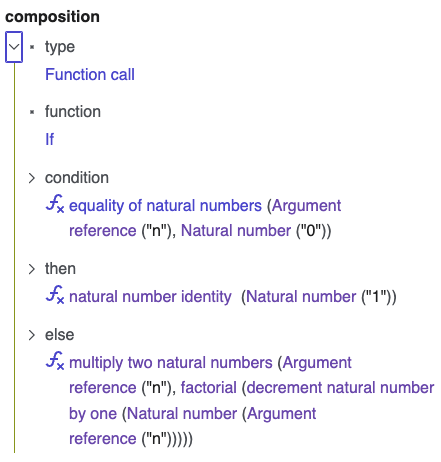{#fig-wikilambda-factorial }

The Wikilambda code is extremely verbose, partly because of the extreme simplicity of the language. In what follows, I analyse selected lines of @lst-wikilambda-factorial to illustrate some similarities and differences with @lst-scheme-factorial.

The first crucial similarity is that both Scheme and Wikilambda use prefix notation.[3] Ordinary mathematical notation uses *in*fix notation, with optional parentheses. Consider the expression $3 + 2 \times 4$. The $+$ and $\times$ symbols go *in between* the numerals, and are therefore “infixes.” Parentheses are optional because there is a rule that tells us to perform the multiplication before the addition. There is no need to write $3 + (2 \times 4)$. In both Scheme and Wikilambda, the mathematical operator goes *before* the numerals, and parentheses are compulsory. Here is the multiplication in @lst-wikilambda-factorial:

``` json
{
  "Z1K1": "Z7",
  "Z7K1": "Z13539",
  "Z13539K1": { ... },
  "Z13539K2": { ... }
}
```

Line 2  
A [Z7](https://www.wikifunctions.org/wiki/Z7) is a “Function Call.” The next few lines will tell Wikilambda which function to “call,” and what its inputs are.

Line 3  
First comes the function. [Z13539](https://www.wikifunctions.org/wiki/Z13539) is the function “multiply two natural numbers.”

Line 4  
Next comes the first number, also called the “multiplicand.” The label has two parts, “Z13539,” referring to the multiplication function, and “K1,” meaning “the first input.”

Line 5  
Finally comes the second number, also called the “multiplier.” The label again has two parts, “Z13539” for the function, and “K2” for “second input.”

Line 6  
The expression is fully parenthised. Because Wikilamdba uses JSON as its file format, it uses curly braces `{}` rather than the traditional parentheses `()`.

This excerpt is far more verbose than the equivalent section of @lst-scheme-factorial:

``` scheme
(* ... ...)
```

The verbosity is due to Wikilambda’s extreme simplicity. Scheme has some rudimentary syntactical rules that are absent from Wikilamda. For example, in Wikilambda, the multiplication is explicitly labelled as a [Z7:Function Call](https://www.wikifunctions.org/wiki/Z7), so that the system knows that the user intends to call a function. In Scheme, there is no need to label the expression as a function call: it is simply assumed that the first symbol in the parentheses is a function, which will be applied to whatever symbols come after it. In Wikilambda, each part of the expression is explicitly labelled. We can see from the labels which is the first input (“K1”) and which is the second input (“K2”) to the function. In Scheme, this labelling is handled by the programming system. The writer of code can simply write the two inputs to the function, and the Scheme interpreter will do the work of labelling them as “input 1” and “input 2.”

This explicit labelling does justify the idea that programming Wikilambda allows users to directly manipulate the “abstract syntax tree.” Work that is usually done by the program interpreting the code is instead being done by the human programmer. The labelling also means that the order of parts of the program is strictly speaking irrelevant. Although the code is presented in prefix notation, with the function first and it inputs in their proper order second, the function orchestrator actually uses the provided labels to determine what the function and its inputs are. It would still evaluate the code correctly if the lines were jumbled up. In Scheme, however, the interpreter relies on the symbols being in their proper order.

There are many other differences between Scheme and Wikilambda, but one further contrast will serve to illustrate the tricky problems of language design faced by the Wikilambda programmers. The crucial contrast lies in the `if` function, which enables the factorial function to be recursive. Recall that `if` is necessary in order to select which rule to apply: `if` $n = 0$, one rule applies, else the other applies.

``` json
{
  "Z1K1": "Z7",
  "Z7K1": "Z802",
  "Z802K1": { ... },
  "Z802K2": { ... },
  "Z802K3": { ... }
}
```

Lines 2-3  
This is the most important aspect of this expression: the “If” function ([Z802](https://www.wikifunctions.org/wiki/Z802)) is just an ordinary function like any other, invoked by a “Function Call” ([Z7](https://www.wikifunctions.org/wiki/Z7)). As we will see, when the Wikilambda team opted to treat all control strcutres as simple functions, they obliged themselves to implement “lazy evaluation,” which has significant consequences for the entire system \[@noauthor_wikifunctionsfunction_2024; @noauthor_abstract_2024\].

Line 4  
The first input (“K1”) is the “condition.” In @lst-wikilambda-factorial, the condition checks whether $n = 0$.

Line 5  
The second input (“K2”) is the “consequent” or “then” expression: what the function will do if the “condition” is true.

Line 6  
The third input (“K3”) is the “alternative” or “else” expression: what the function will do if the “condition” is false.

To understand the need for “lazy evaluation” in Wikilambda, we can again contrast it with Scheme. In Scheme, `if` is not a normal function, but rather a “special form” which behaves differently to an ordinary function. When an ordinary function is called in Scheme, all its inputs are evaluated before the function is then applied to them. This is called “applicative order” evaluation. For example, imagine we wanted to calculate

$$(3 + 1) \times (4 \div 2)$$

In Scheme, that is written:

``` scheme
(* (+ 3 1) (/ 4 2))
```

We start at `*`, the multiplication operator. Before we apply this operator, we first evaluate the inputs:

``` scheme
(* 4 2)
```

Once the values of the inputs are known, we perform the multiplication:

``` scheme
8
```

Now imagine that we wanted to calculate $1!$. Let us evaluate the code in @lst-scheme-factorial:

``` scheme
(factorial 1)
```

This becomes

``` scheme
(if (= 1 0)
    1
    (* 1 (factorial (- 1 1))))
```

Now, if we follow the usual rule of applicative order evaluation, before we can apply the `if` function, we need to evaluate all its inputs. The function has three inputs, namely the *condition*, the *consequent* and the *alternative*. Let us evaluate them.

``` scheme
(if #f
    1
    (* 1 (factorial 0)))
```

Line 1  
It is false (`#f`) that `n` is equal to `1`.

Line 2  
The value of `1` is one. Evaluating this expression is trivial.

Line 3  
This is a complex expression. Before we can apply the `*`, we need to evaluate its two inputs. The first input, `1`, is equal to `1`. The second input, `(factorial (- 1 1))` is equal to `(factorial 0)`.

We still haven’t fully evaluated the inputs to `if`, so now we need to evaluate `(factorial 0)`. Then we will be able to multiply it by `1` to finish evaluating that last line of the code. `(factorial 0)` becomes:

``` scheme
(if (= 0 0) ; evaluates to #t
    1       ; evaluates to 1
    (* 0 (factorial (- 0 1)))
```

Ah, we have another complex expression, `(factorial (- 0 1))`. Before we can evaluate the `if`, we need to work out the value of `(factorial (- 0 1))`, which is of course `(factorial -1)`. Before we can evaluate that, we need to work out the value of `(factorial (- -1 1))`, which is of course `(factorial -2)`, and so on. Our code is broken. It will never stop subtracting $1$ from $n$, and will never return us an answer.

The solution in Scheme is to treat `if` as a “special form.” When we call an ordinary function in Scheme, all the inputs are evaluated straight away. But when we use `if`, only the *condition* is evaluated. Then, depending on the outcome of that, *either* the consequent *or* the alternative are evaluated. Thus in fact the Scheme code does work. Thus in fact, when we reach `(factorial 0)`, the following will happen:

``` scheme
(if (= 0 0)
    1
    (* 0 (factorial (- 0 1))))

(if #t
    1
    (* 0 (factorial (- 0 1))))
    
1
```

Line 1  
First evaluate the condition.

Line 5  
It is true (`#t`).

Line 6  
Therefore evaluate the *consequent*.

Line 7  
We ignore the *alternative*, and don’t try to evaluate `(factorial -1)`.

Line 9  
The output is `1`.

@sussman_scheme_1975 \[p. 26\] argue that any “practical lambda calculus interpreter” must include a mixture of applicative-order functions like `*`, whose inputs are evaluated straightaway, and “normal-order” functions like `if`, whose inputs are only evaluated when needed. Aside from `if`, Scheme provides several other “special forms” to support essential programming constructs \[@noauthor_special_1997\]. These include:

-   `define`, which allows the creation of *global variables* accessible throughout the program;
-   `set!`, which allows *global variables* to be changed or updated;
-   `let`, which allows the creation of *local variables* that exist in a certain part of the program only; and
-   `cond`, which is similar to `if`, but allows you to set multiple *conditions* with difference consequences in each case.

Wikilambda does not provide any “special forms” to end-users, though there are some hidden inside the software that can be accessed by its developers. To make the `if` function work properly, therefore, Wikilambda cannot adopt applicative order evaluation, the way Scheme and other LISPs have done. Instead, *all* functions in Wikilambda are evaluated like Scheme’s `if`. The inputs to a function are only evaluated if they are needed.

There are many known advantages to “lazy evaluation”, which can increase the modularity of code, and enable the use of “infinite” data structures \[@hudak_conception_1989, p. 385\]. But very few mainstream languages use it as the default evaluation strategy, because it is inherently very inefficient. In order to implement lazy evaluation, the Wikilambda team have had to implement …

## Code: a most perfect and universal hack

*Close reading of the orchestrator code*

## Coda: Platform Level 4

So, what kind of thing is Wikilambda?

In an influential blog post, Marc @andreessen_three_2007 distinguishes three “levels” of internet platform, depending on the platform’s degree of programmability:

-   Level 1: the platform allows external applications to access its data
-   Level 2: the platform allows external applications to be embedded in its user interface
-   Level 3: the platform allows internal applications, that is, it allows developers to write an run code in the platform itself

Wikipedia is already a Level 3 platform. It provides a rich access API (Level 1), allows third-party tools to be embedded in its UI (Level 2), and provides servers—known as Toolforge—where users can write and run code within Wikipedia itself (Level 3). Since Wikilambda runs on top of the same MediaWiki software as Wikipedia, it too is a Level 3 platform by default.

But Wikilambda does something else besides. All the platforms Andreessen considers have a fixed API. That is, the platform provides some primitive functionality which developers can build on to create their own applications. Wikilambda provides something new: a *programmable* API. And once the Wikifunctions service is hooked up to Wikidata and other Wikimedia projects, it will provide a programmable API for these projects too.

What does this mean? …

## References

[1] In what follows, I use “Wikifunctions” and “Wikilambda” interchangeably, as my sources dictate. There is no risk of confusion, because Wikifunctions is currently the only database running the Wikilambda software.

[2] For a brilliant and readable introduction to recursive functions, I would recommend @friedman_little_2007.

[3] Also known as “Cambridge Polish” syntax: @steele_jr_art_1978 \[p. 2\].